In [1]:
%%time
! pip install fastai --upgrade

CPU times: user 49 ms, sys: 10.6 ms, total: 59.6 ms
Wall time: 3.94 s


In [2]:
%%time
import fastai
from fastai.vision.all import *
from pathlib import Path

CPU times: user 1.25 s, sys: 405 ms, total: 1.66 s
Wall time: 1.55 s


In [3]:
%%time

## exploring tta 
img = Image.open("/content/download (5).jfif")

CPU times: user 8.32 ms, sys: 847 µs, total: 9.16 ms
Wall time: 13.9 ms


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


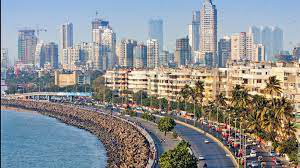

In [3]:
%%time

img

In [4]:
%%time

print (img.shape)

(168, 300)
CPU times: user 0 ns, sys: 117 µs, total: 117 µs
Wall time: 124 µs


CPU times: user 384 µs, sys: 750 µs, total: 1.13 ms
Wall time: 5.74 ms


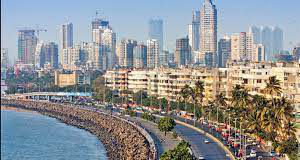

In [8]:
%%time
img.crop((0,0,300,160))

CPU times: user 188 µs, sys: 0 ns, total: 188 µs
Wall time: 197 µs


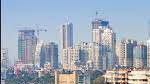

In [10]:
%%time
## left upper part
img.crop((0,0,150,84))

CPU times: user 59 µs, sys: 0 ns, total: 59 µs
Wall time: 62.9 µs


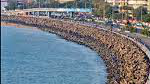

In [17]:
%%time

##left lower part
img.crop((0,84,150,168))

CPU times: user 130 µs, sys: 18 µs, total: 148 µs
Wall time: 157 µs


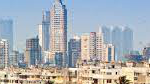

In [18]:
%%time

## right upper part
img.crop((150,0,300,84))

CPU times: user 1.01 ms, sys: 0 ns, total: 1.01 ms
Wall time: 1.01 ms


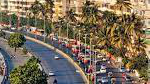

In [20]:
%%time

## right lower part
img.crop((150,84,300,168))

CPU times: user 24.2 ms, sys: 917 µs, total: 25.1 ms
Wall time: 30.1 ms


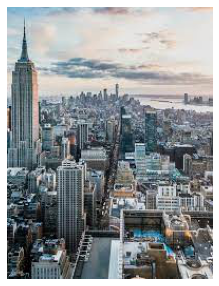

In [22]:
%%time

## checking on another image

img = Image.open("/content/download (3).jfif")

show_image(img)

In [23]:
%%time

h = img.shape[0]

w = img.shape[1]

print (h,w)

258 195
CPU times: user 2.82 ms, sys: 0 ns, total: 2.82 ms
Wall time: 2.86 ms


CPU times: user 22.6 ms, sys: 0 ns, total: 22.6 ms
Wall time: 25 ms


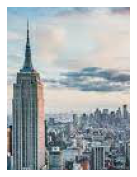

In [24]:
%%time

def left_upper(img,h,w):
  return img.crop((0,0,w//2,h//2))

show_image(left_upper(img,h,w))

In [25]:
%%time

def left_lower(img,h,w):
  return img.crop((0, h//2, w//2, h))

def right_upper(img,h,w):
  return img.crop((w//2,0,w,h//2))

def right_lower(img,h,w):
  return img.crop((w//2, h//2, w, h))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


CPU times: user 29.5 ms, sys: 795 µs, total: 30.3 ms
Wall time: 37.4 ms


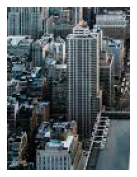

In [26]:
%%time

show_image(left_lower(img,h,w))

CPU times: user 20.3 ms, sys: 881 µs, total: 21.1 ms
Wall time: 23.2 ms


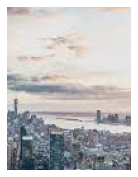

In [27]:
%%time

show_image(right_upper(img,h,w))

CPU times: user 19.9 ms, sys: 0 ns, total: 19.9 ms
Wall time: 23.1 ms


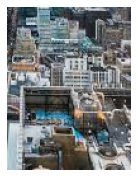

In [28]:
%%time

show_image(right_lower(img,h,w))

In [4]:
%%time
path = untar_data(URLs.PETS)

CPU times: user 2.45 ms, sys: 0 ns, total: 2.45 ms
Wall time: 2.35 ms


In [5]:
%%time
path.ls()

CPU times: user 61 µs, sys: 1.03 ms, total: 1.09 ms
Wall time: 736 µs


(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
%%time
(path/"images/").ls()

CPU times: user 14.5 ms, sys: 6.49 ms, total: 21 ms
Wall time: 26.6 ms


(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_172.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_70.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_131.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_65.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_121.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_49.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_173.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_17.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_187.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_5.jpg')...]

In [7]:
%%time
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(seed = 41),
                  get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                  item_tfms = Resize(460),
                  batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

CPU times: user 3.12 ms, sys: 0 ns, total: 3.12 ms
Wall time: 3.13 ms


In [8]:
%%time

dls = pets.dataloaders(path/"images/", device = "cuda")

CPU times: user 2.3 s, sys: 826 ms, total: 3.12 s
Wall time: 3.1 s


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


CPU times: user 1.08 s, sys: 72.7 ms, total: 1.15 s
Wall time: 1.15 s


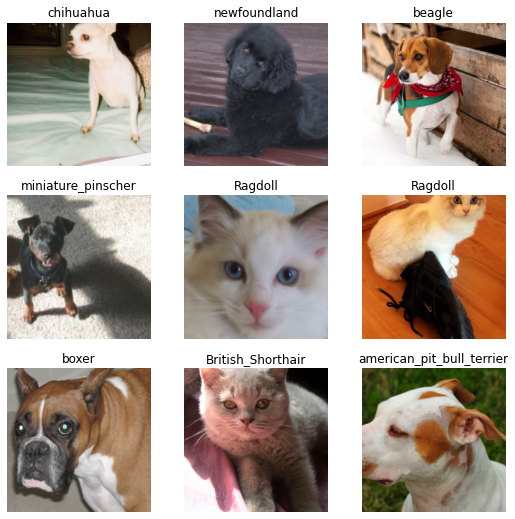

In [9]:
%%time
dls.show_batch(max_n=9)

CPU times: user 36.2 s, sys: 5.5 s, total: 41.7 s
Wall time: 1min 20s


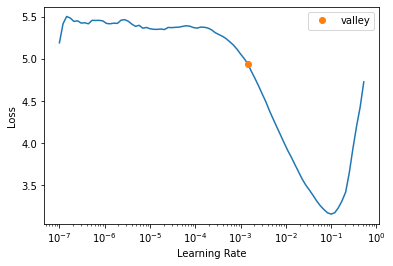

In [10]:
%%time
learn = cnn_learner(dls, resnet34, metrics = error_rate)

learn.lr_find()

In [11]:
%%time
learn.fit_one_cycle(n_epoch = 5, lr_max = 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.947531,0.860926,0.227334,01:37
1,0.957057,0.871863,0.232070,01:36
2,0.684321,0.522491,0.144790,01:37
3,0.463328,0.305195,0.094046,01:37
4,0.304375,0.288481,0.089986,01:37


CPU times: user 3min 24s, sys: 27 s, total: 3min 51s
Wall time: 8min 6s


CPU times: user 38.7 ms, sys: 1.88 ms, total: 40.6 ms
Wall time: 41 ms


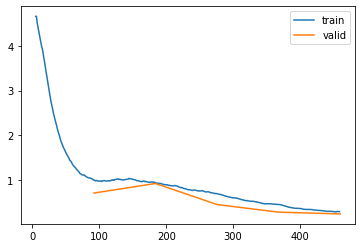

In [42]:
%%time
learn.recorder.plot_loss()

In [43]:
%%time 

##checking on fastai tta function

preds, targs = learn.tta()

CPU times: user 28.1 s, sys: 2.05 s, total: 30.1 s
Wall time: 1min 28s


In [44]:
%%time

accuracy(preds, targs)

CPU times: user 3.28 ms, sys: 915 µs, total: 4.19 ms
Wall time: 3.32 ms


TensorBase(0.9323)

In [45]:
%%time

# custom tta function

learn.dls.train.after_batch

CPU times: user 25 µs, sys: 3 µs, total: 28 µs
Wall time: 49.4 µs


Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> RandomResizedCropGPU -- {'size': (224, 224), 'min_scale': 0.75, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'max_scale': 1.0, 'p': 1.0} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

In [12]:
%%time

learn.dls.valid.after_batch

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 14.5 µs


Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> RandomResizedCropGPU -- {'size': (224, 224), 'min_scale': 0.75, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'max_scale': 1.0, 'p': 1.0} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

In [13]:
%%time

class UpperLeft(Transform):
  def __init__(self, size):
    self.size = size 
  
  def encodes(self, img:TensorImage):
    _,_,h,w = img.shape
    return img[..., :self.size, :self.size]

class LowerLeft(Transform):
  def __init__(self, size):
    self.size = size

  def encodes(self, img:TensorImage):
    _,_,h,w = img.shape
    return img[...,h - self.size:, :self.size]

class UpperRight(Transform):
  def __init__(self, size):
    self.size = size

  def encodes(self, img:TensorImage):
    _,_,h,w = img.shape
    return img[..., :self.size, w-self.size:]

class LowerRight(Transform):
  def __init__(self, size):
    self.size = size

  def encodes(self, img:TensorImage):
    _,_,h,w = img.shape
    return img[..., h - self.size:,w- self.size:]

CPU times: user 1.85 ms, sys: 0 ns, total: 1.85 ms
Wall time: 1.86 ms


In [14]:
%%time

def tta_custom(learn, dl, size):
  tfms = [UpperLeft(size), LowerLeft(size), UpperRight(size), LowerRight(size)]
  fin_preds = []
  preds, targs = learn.get_preds()
  fin_preds.append(preds[None])
  for tfm in tfms :
    dl = dl.new(after_batch = Pipeline([IntToFloatTensor, tfm]))
    fin_preds.append(learn.get_preds(dl = dl, inner = True)[0][None])

  
  fin_preds = torch.cat(fin_preds).mean(0)
  return fin_preds, targs




CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [ ]:
%%time 
fin_preds, targs = tta_custom(learn, dls, 224)

2